In [ ]:
import numpy as np
from sklearn import linear_model
import scipy.misc
from matplotlib import pyplot as plt

# OMP

### the code follows the idea below,but not do exactly as the process shown in this pseudo-code
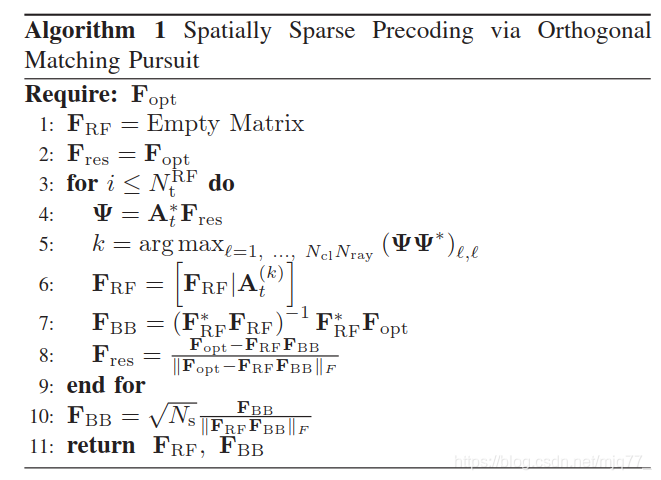

In [ ]:
def OMP(A:np.array,b:np.array)->np.array:
    """"
    only for 2D
    """
    # init
    support=np.zeros(A.shape()[1])
    threshold=1
    Error=threshold+1
    residual=b
    # 
    
#     pass
class OMP:
    def __init__(self) -> None:
        # init
        self.support=None
        self.threshold=0.001
        self.Error=self.threshold+1
        self.residual=None
    def process_matrix(self,A,Y)->np.array:
        """
        only for 2D
        """
        y_nums=Y.shape[1]
        X=np.zeros((A.shape[1],y_nums))
        print("X.shape:",X.shape)
        for i in range(y_nums):
            print("\n",i," / ",y_nums)
            x=self.process(A,Y[:,i])
            X[:,i]=x.reshape(-1)
        return X
    def process(self,A:np.array,b:np.array)->np.array:
        """"
        only for 2D
        """
        self.__init__()
        self.support=np.zeros(A.shape[1])
        self.residual=b.copy()
        loop=1
        X=None
        # when converge to the threshold or all the columns are within the scope
        while self.Error>self.threshold:
            if((int)(self.support.sum())==(int)(self.support.shape[0])):
                break
            self.support[self.Argmin_i(A,self.residual)]=1
            index=np.nonzero(self.support)[0]
            # print(self.support)
            # print("index:",index)
            A_=A[:,index]
            self.Error,self.residual,X=self.lstsq(A_,b)
            # print("Loop:",loop,"\tError:",self.Error,"\nresidual_vector:",self.residual,"\nself.support:",self.support.sum())
            loop=loop+1
        print("Loop:",loop,"\tError:",self.Error,"\nresidual_vector:",self.residual,"\nself.support:",self.support.sum())
        return X

# Find the most similar column vector with the residual vector in A 
    def Argmin_i(self,A,b)->int:
        k=A.shape[1]
        result=-1
        res=float('inf')
        for i in range(k):
            if(self.support[i]):
                continue
            a_column=A[:,i].reshape(-1,1)
            zoom_factor=np.dot(a_column.transpose(),b)/np.dot(a_column.transpose(),a_column)
            res_=np.linalg.norm(b-a_column*zoom_factor,ord=2)
            if(res_<res):
                res=res_
                result=i
        return int(result)
    def lstsq(self,A,b)->tuple:
        """
        return a lot
        """
        # print("A",A.shape)
        index=np.nonzero(self.support)
        # print("index:",index)
        b=b.reshape(-1,1)
        I=np.eye(int(A.shape[1]))
        factor=0.0001
        x=np.matmul(np.matmul(np.linalg.inv(np.matmul(A.T,A)+factor*I),A.T),b)
        result=b-np.matmul(A,x)
        res=np.linalg.norm(result)
        # print("support.shape:",self.support.shape)
        X=np.zeros((int(self.support.shape[0]),1))
        # print(X.shape)
        X[index,:]=x
        return res,result,X

In [ ]:
omp=OMP()
A=np.array([
    [1,2,3,4,5,23,123],
    [4,2,5,3,123,12,42],
    [1,2,5,6,14,22,4],
])
b=np.array([[1,2,2.3],
            [1,3,2.5]])
b=b.transpose()
X=omp.process_matrix(A,b)
print("result:",X,"\nreconstruct:\n",np.matmul(A,X),"\noriginal_b:\n",b)

# K-SVD

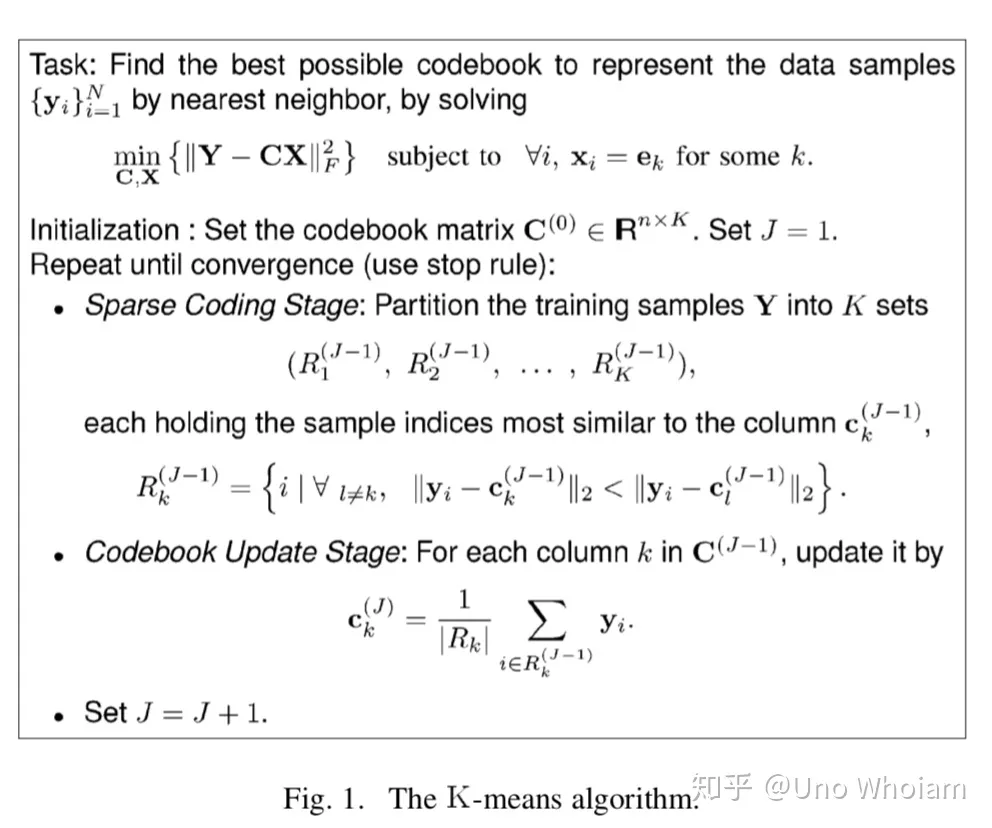

In [114]:
class KSVD(object):
    def __init__(self, n_components, max_iter=30, tol=1e-3,
                 n_nonzero_coefs=None):
        """
        :param n_components: the row of dict
        :param max_iter: max_iterate num
        :param tol: the upper bound of allowable error
        :param n_nonzero_coefs: sparseness
        """
        self.dictionary = None
        self.sparsecode = None
        self.max_iter = max_iter
        self.tol = tol
        self.n_components = n_components
        self.n_nonzero_coefs = n_nonzero_coefs
        self.omp=OMP()

    def _initialize(self, y):
        """
        初始化字典矩阵
        """
        print("initialize...")
        u, s, v = np.linalg.svd(y)
        self.dictionary = u[:, :self.n_components]

    def _update_dict(self, y, d, x):
        for i in range(self.n_components):
            index = np.nonzero(x[i, :])[0]
            if len(index) == 0:
                continue

            d[:, i] = 0
            r = (y - np.dot(d, x))[:, index]
            u, s, v = np.linalg.svd(r, full_matrices=False)
            d[:, i] = u[:, 0].T
            x[i, index] = s[0] * v[0, :]
        return d, x

    def fit(self, y):
        self._initialize(y)
        for i in range(self.max_iter):
            x = linear_model.orthogonal_mp(self.dictionary, y, n_nonzero_coefs=self.n_nonzero_coefs)
            # x=omp.process_matrix(self.dictionary,y)
            e = np.linalg.norm(y - np.dot(self.dictionary, x))
            if e < self.tol:
                break
            print("update:",i,"\ttol:",e,'\n')
            self._update_dict(y, self.dictionary, x)

        self.sparsecode = linear_model.orthogonal_mp(self.dictionary, y, n_nonzero_coefs=self.n_nonzero_coefs)
        return self.dictionary, self.sparsecode

In [115]:
#it takes about 10 mins using the library provided by sklearn to compute the sparse solution for DX=Y 
#for the omp i write it will take about a day to run one epoch,about a week to finish the work
if __name__ == '__main__':
    im_ascent = scipy.misc.ascent().astype(float)
    ksvd = KSVD(300)
    dictionary, sparsecode = ksvd.fit(im_ascent)
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(im_ascent)
    plt.subplot(1, 2, 2)
    plt.imshow(dictionary.dot(sparsecode))
    plt.show()

C:\Users\32081\AppData\Local\Temp\ipykernel_81428\2621363323.py:4: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  im_ascent = scipy.misc.ascent().astype(float)


initialize...
update: 0 	tol: 6439.510109199841 

update: 1 	tol: 5390.136597882463 

update: 2 	tol: 4839.095848048947 

update: 3 	tol: 4497.453041380399 

update: 4 	tol: 4245.391063616442 

update: 5 	tol: 4061.1299167369366 

update: 6 	tol: 3933.0486385879935 



KeyboardInterrupt: 